In [1]:
import pure_cv as vc
import moveread.boxes as bxs
import scoresheet_models as sm
import robust_extraction2 as re

In [2]:
modelIds = (await sm.fetch_models()).unsafe()
models = { k: (await sm.fetch_model(k)).unsafe() for k in modelIds }

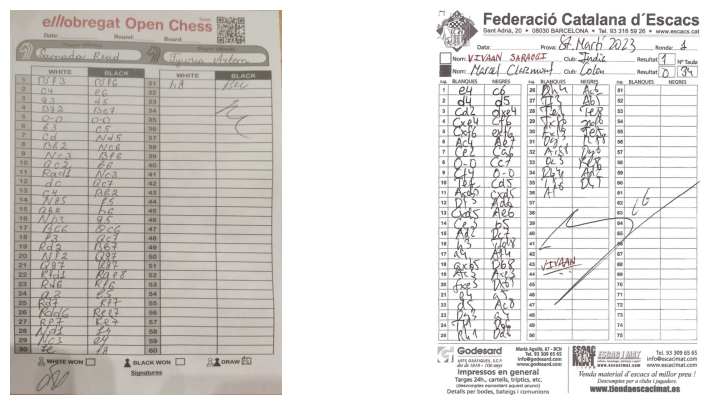

In [3]:
fcde_sheet = vc.imread('/home/m4rs/github/automation/cit/resources/images/models/fcde/xl.jpg')
llobre_sheet = vc.imread('/home/m4rs/github/automation/cit/resources/images/models/llobregat23/xl.jpg')
vc.show(llobre_sheet, fcde_sheet)

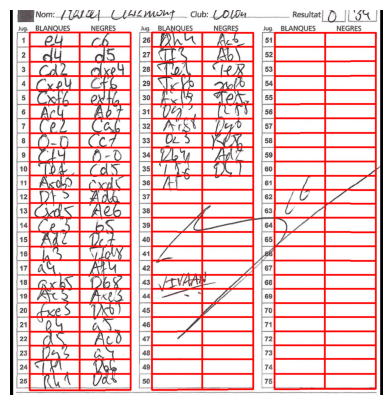

In [31]:
# BOX COORDS
res = re.extract(fcde_sheet, models['fcde']).unsafe()
vc.show(vc.draw.contours(res.corr_img, res.cnts))

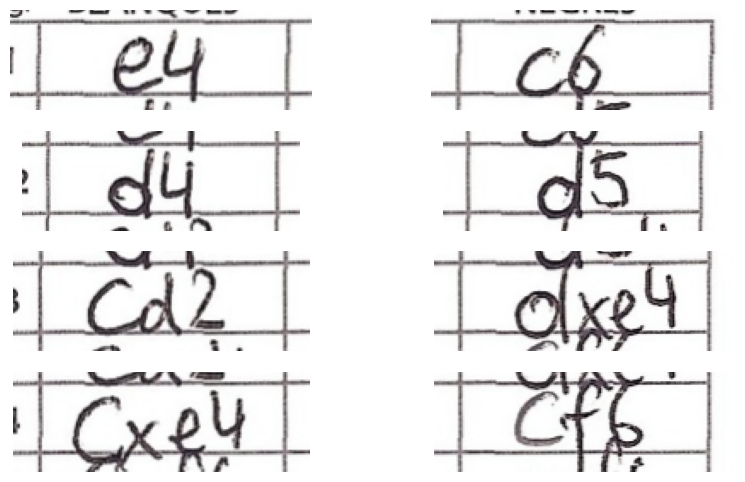

In [21]:
ann = bxs.exportable(bxs.Annotations(box_contours=res.cnts), 'llobregat23').unsafe()
boxes = bxs.export(res.corr_img, ann, models)
vc.show(*boxes[:8], ncols=2, height=1.5)

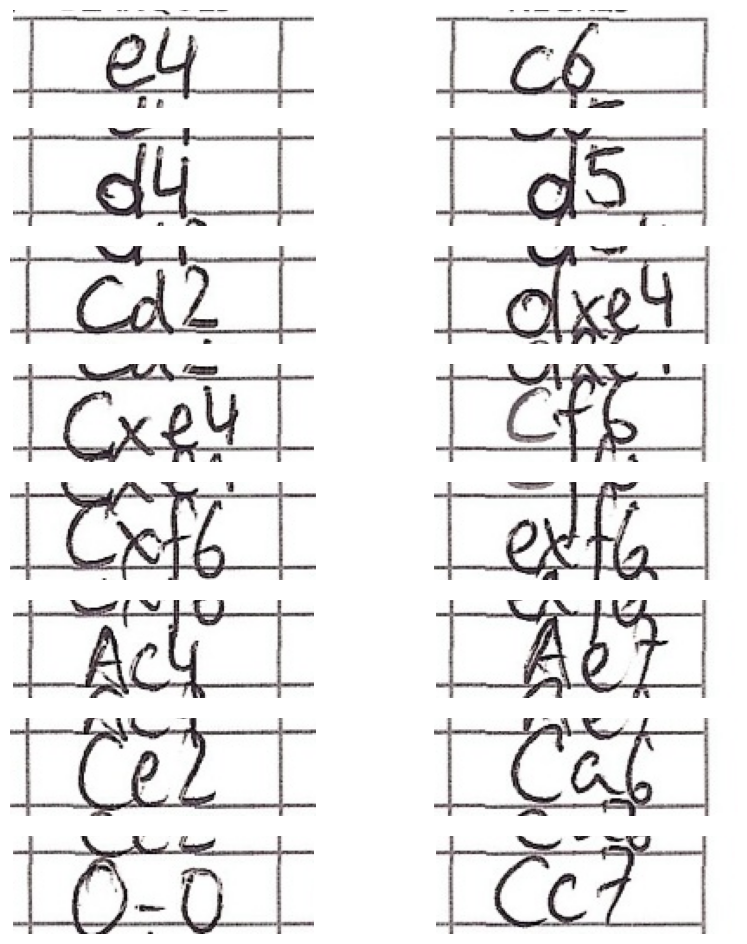

In [23]:
# MANUAL COORDS
ann = bxs.exportable(
  bxs.Annotations(grid_coords=bxs.Rectangle(tl=(0.05, 0.195), size=(0.935, 0.66))),
  'fcde'
).unsafe()
boxes = bxs.export(fcde_sheet, ann, models)
vc.show(*boxes[:16], ncols=2, height=1.5)